In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
ksi_df = pd.read_csv('Data/KSI.csv')

In [37]:
# it has been said that ACCNUM may repeat YoY in the data dictionary
# Therefore, ACCNUM is not a unique identifier
# this would mean that an ACCNUMs for different years will have same ACCNUM but different DATE
# checking for that here

# no records returned
ksi_df[(ksi_df['ACCNUM'] == ksi_df['ACCNUM']) & (ksi_df['DATE'] != ksi_df['DATE'])]
# this means that ACCNUM is a unique identifier

,X,Y,INDEX_,ACCNUM,YEAR,DATE,TIME,HOUR,STREET1,STREET2,OFFSET,ROAD_CLASS,DISTRICT,WARDNUM,DIVISION,LATITUDE,LONGITUDE,LOCCOORD,ACCLOC,TRAFFCTL,VISIBILITY,LIGHT,RDSFCOND,ACCLASS,IMPACTYPE,INVTYPE,INVAGE,INJURY,FATAL_NO,INITDIR,VEHTYPE,MANOEUVER,DRIVACT,DRIVCOND,PEDTYPE,PEDACT,PEDCOND,CYCLISTYPE,CYCACT,CYCCOND,PEDESTRIAN,CYCLIST,AUTOMOBILE,MOTORCYCLE,TRUCK,TRSN_CITY_VEH,EMERG_VEH,PASSENGER,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,POLICE_DIVISION,HOOD_ID,NEIGHBOURHOOD,ObjectId,MONTH,DAY


In [4]:
ksi_df.columns

Index(['X', 'Y', 'INDEX_', 'ACCNUM', 'YEAR', 'DATE', 'TIME', 'HOUR', 'STREET1',
       'STREET2', 'OFFSET', 'ROAD_CLASS', 'DISTRICT', 'WARDNUM', 'DIVISION',
       'LATITUDE', 'LONGITUDE', 'LOCCOORD', 'ACCLOC', 'TRAFFCTL', 'VISIBILITY',
       'LIGHT', 'RDSFCOND', 'ACCLASS', 'IMPACTYPE', 'INVTYPE', 'INVAGE',
       'INJURY', 'FATAL_NO', 'INITDIR', 'VEHTYPE', 'MANOEUVER', 'DRIVACT',
       'DRIVCOND', 'PEDTYPE', 'PEDACT', 'PEDCOND', 'CYCLISTYPE', 'CYCACT',
       'CYCCOND', 'PEDESTRIAN', 'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK',
       'TRSN_CITY_VEH', 'EMERG_VEH', 'PASSENGER', 'SPEEDING', 'AG_DRIV',
       'REDLIGHT', 'ALCOHOL', 'DISABILITY', 'POLICE_DIVISION', 'HOOD_ID',
       'NEIGHBOURHOOD', 'ObjectId'],
      dtype='object')

In [5]:
ksi_df['DATE'] = pd.to_datetime(ksi_df['DATE'])

ksi_df['MONTH'] = ksi_df['DATE'].dt.month_name()
ksi_df['DAY'] = ksi_df['DATE'].dt.day_name()


<AxesSubplot:ylabel='DAY'>

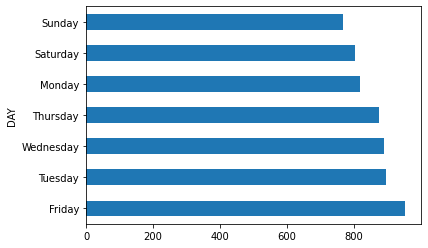

In [6]:
ksi_df.groupby('DAY')['ACCNUM'].nunique().sort_values(ascending = False).plot(kind = 'barh')

<AxesSubplot:xlabel='HOUR'>

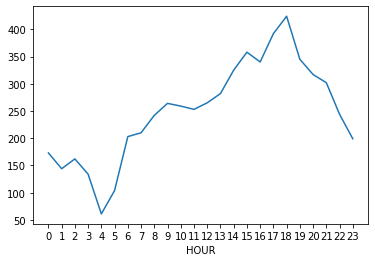

In [7]:
# xticks just makes sure that every hour is plotted instead of 5 hour intervals

ksi_df.sort_values('HOUR', ascending = False).groupby(['HOUR'])['ACCNUM'].nunique().plot(kind = 'line', xticks = range(24))

<AxesSubplot:ylabel='DRIVCOND'>

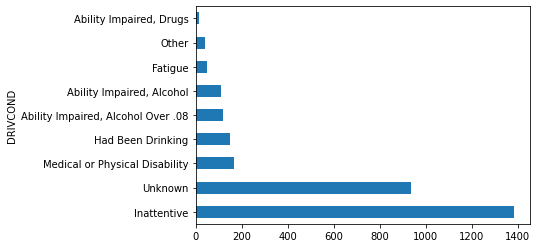

In [8]:
# ignoring Normal and <Null>, keep in mind <Null> means not applicable

ksi_df.groupby('DRIVCOND')['ACCNUM'].nunique().sort_values(ascending = False)[2:].plot(kind = 'barh')

<AxesSubplot:ylabel='DRIVCOND'>

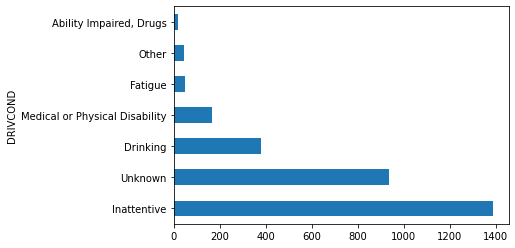

In [45]:
# making small function to collapse all drinking conditions into one

def drinkcond(col, colname):
    if col[colname] in ('Ability Impaired, Alcohol Over .08', 'Had Been Drinking', 'Ability Impaired, Alcohol', 'Ability Impaired, Alcohol Over .80'):
        return 'Drinking'
    
    # if not drinking, return condition
    
    return col[colname]
    
ksi_df['DRIVCOND'] = ksi_df.apply(drinkcond, args = ('DRIVCOND',), axis = 1)
ksi_df.groupby('DRIVCOND')['ACCNUM'].nunique().sort_values(ascending = False)[2:].plot(kind = 'barh')

<AxesSubplot:ylabel='IMPACTYPE'>

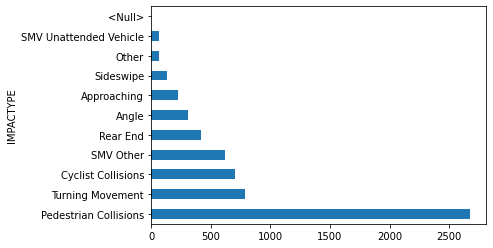

In [10]:
ksi_df.groupby('IMPACTYPE')['ACCNUM'].nunique().sort_values(ascending = False)[0:].plot(kind = 'barh')

<AxesSubplot:ylabel='MANOEUVER'>

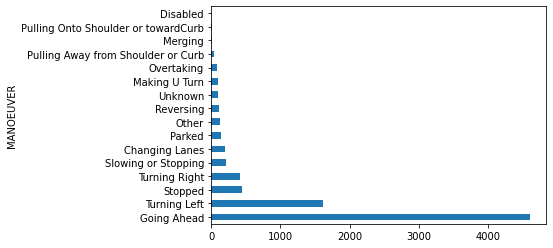

In [12]:
ksi_df[(ksi_df['MANOEUVER'] != '<Null>')].groupby('MANOEUVER')['ACCNUM'].nunique().sort_values(ascending = False).plot(kind = 'barh')

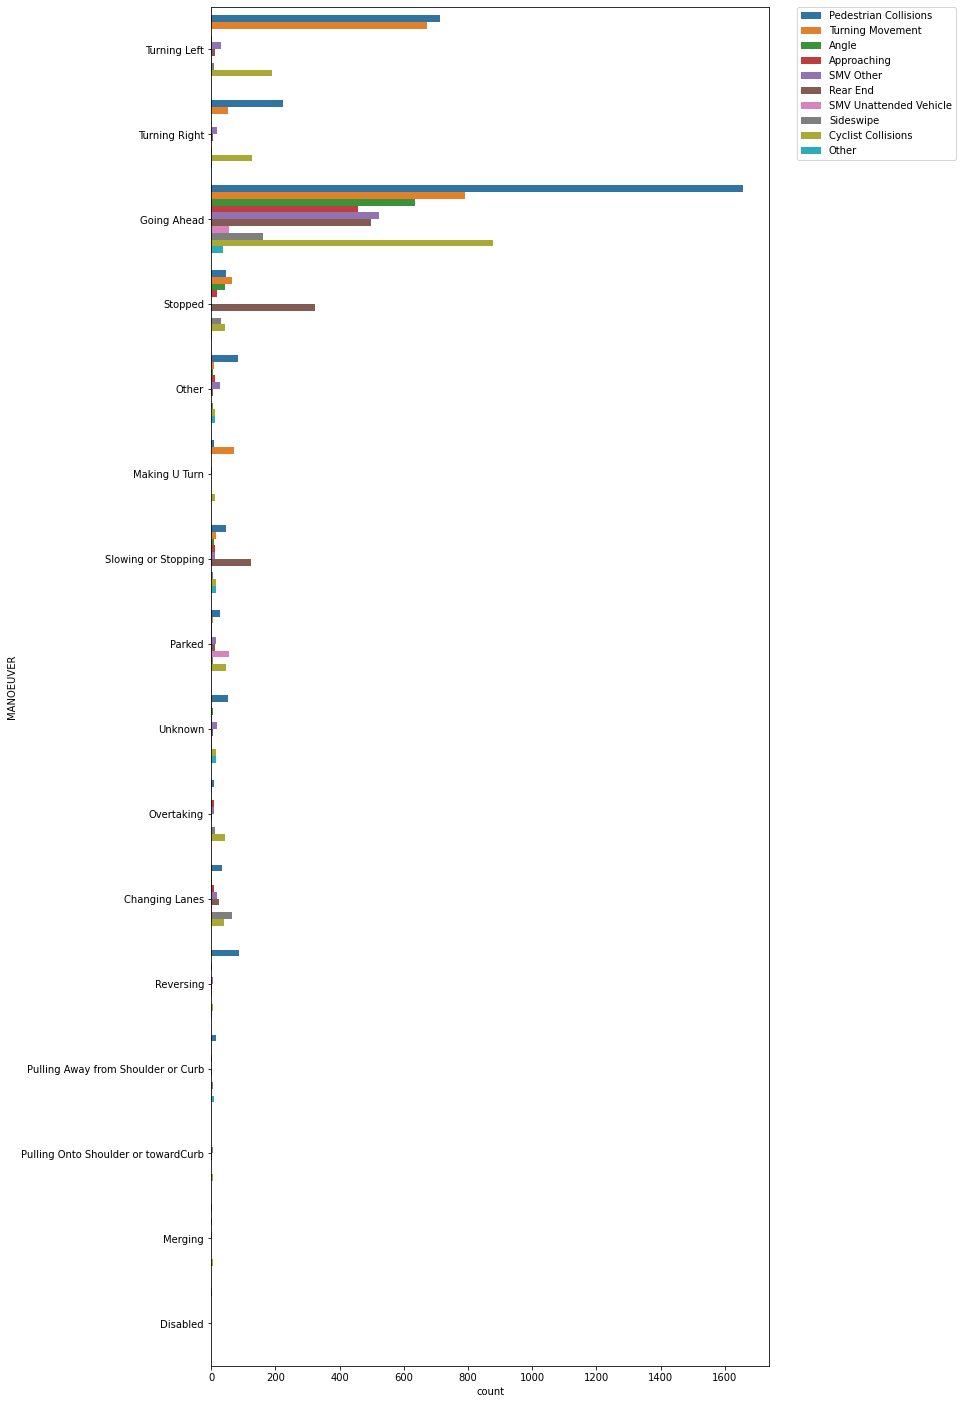

In [27]:
# MANOEUVER by IMPACTYPE

plt.figure(figsize = (10,25))
sns.countplot(data = ksi_df[(ksi_df['MANOEUVER'] != '<Null>') & (ksi_df['IMPACTYPE'] != '<Null>')], y = 'MANOEUVER', hue = 'IMPACTYPE')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

<AxesSubplot:ylabel='MANOEUVER'>

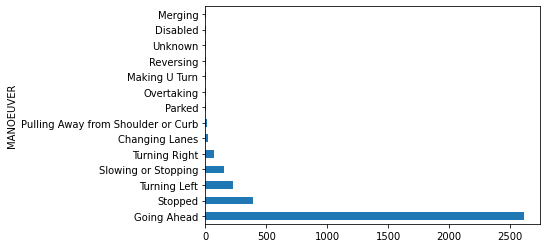

In [13]:
ksi_df[(ksi_df['MANOEUVER'] != '<Null>') & (ksi_df['DRIVACT'] == 'Driving Properly')].groupby('MANOEUVER')['ACCNUM'].nunique().sort_values(ascending = False).plot(kind = 'barh')

<AxesSubplot:ylabel='DRIVACT'>

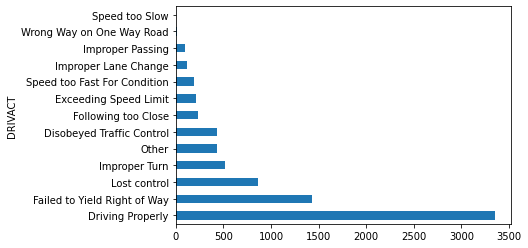

In [14]:
# Looking at DRIVACT just by itself is not that useful
# We must segment

ksi_df[ksi_df['DRIVACT'] != '<Null>'].groupby('DRIVACT')['ACCNUM'].nunique().sort_values(ascending = False).plot(kind = 'barh')

<AxesSubplot:ylabel='MANOEUVER'>

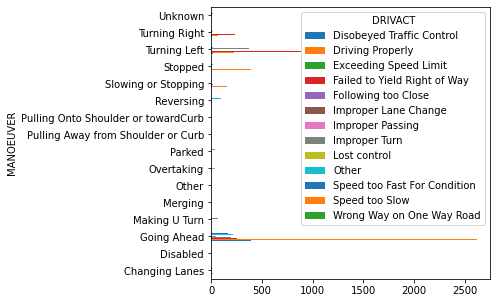

In [15]:
# plotting this in pandas and then did seaborn below - making sure both matches

ksi_df[(ksi_df['MANOEUVER'] != '<Null>') & (ksi_df['DRIVACT'] != '<Null>')].groupby(['MANOEUVER', 'DRIVACT'])['ACCNUM'].nunique().unstack().plot(kind = 'barh', figsize = (5,5))

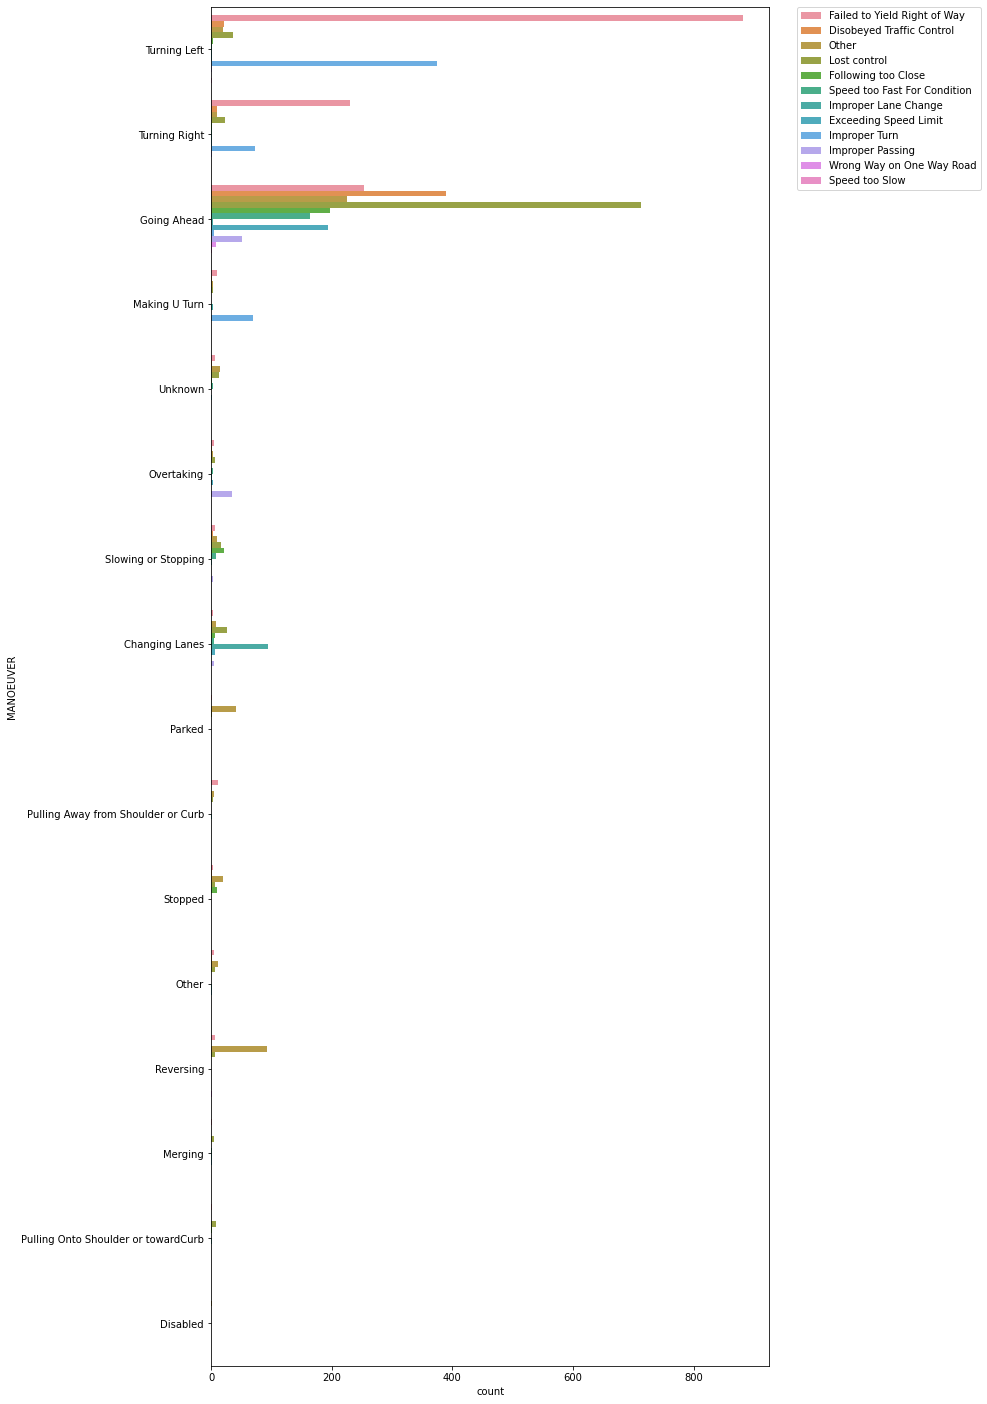

In [33]:
# no need of groupby for this plot

# When turning, drivers don't yield the right of way
# When going ahead, they drive too slow
# When going ahead, they also disobey Traffic Control
# When going ahead, losing control is a major cause of accidents

plt.figure(figsize = (10,25))
sns.countplot(data = ksi_df[(ksi_df['MANOEUVER'] != '<Null>') & (ksi_df['DRIVACT'] != '<Null>') & (ksi_df['DRIVACT'] != 'Driving Properly')], y = 'MANOEUVER', hue = 'DRIVACT')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

<AxesSubplot:ylabel='PEDCOND'>

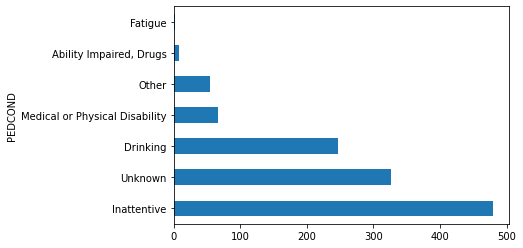

In [46]:
# ignoring normal pedcond - look at it later, we want to find out what peds are doing wrong

ksi_df['PEDCOND'] = ksi_df.apply(drinkcond, args = ('PEDCOND',), axis = 1)
ksi_df[(ksi_df['PEDCOND'] != '<Null>') & (ksi_df['PEDCOND'] != 'Normal')].groupby('PEDCOND')['ACCNUM'].nunique().sort_values(ascending = False).plot(kind = 'barh')

<AxesSubplot:ylabel='PEDACT'>

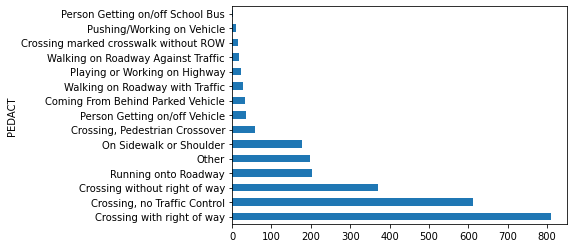

In [20]:
ksi_df[ksi_df['PEDACT'] != '<Null>'].groupby('PEDACT')['ACCNUM'].nunique().sort_values(ascending = False).plot(kind = 'barh')

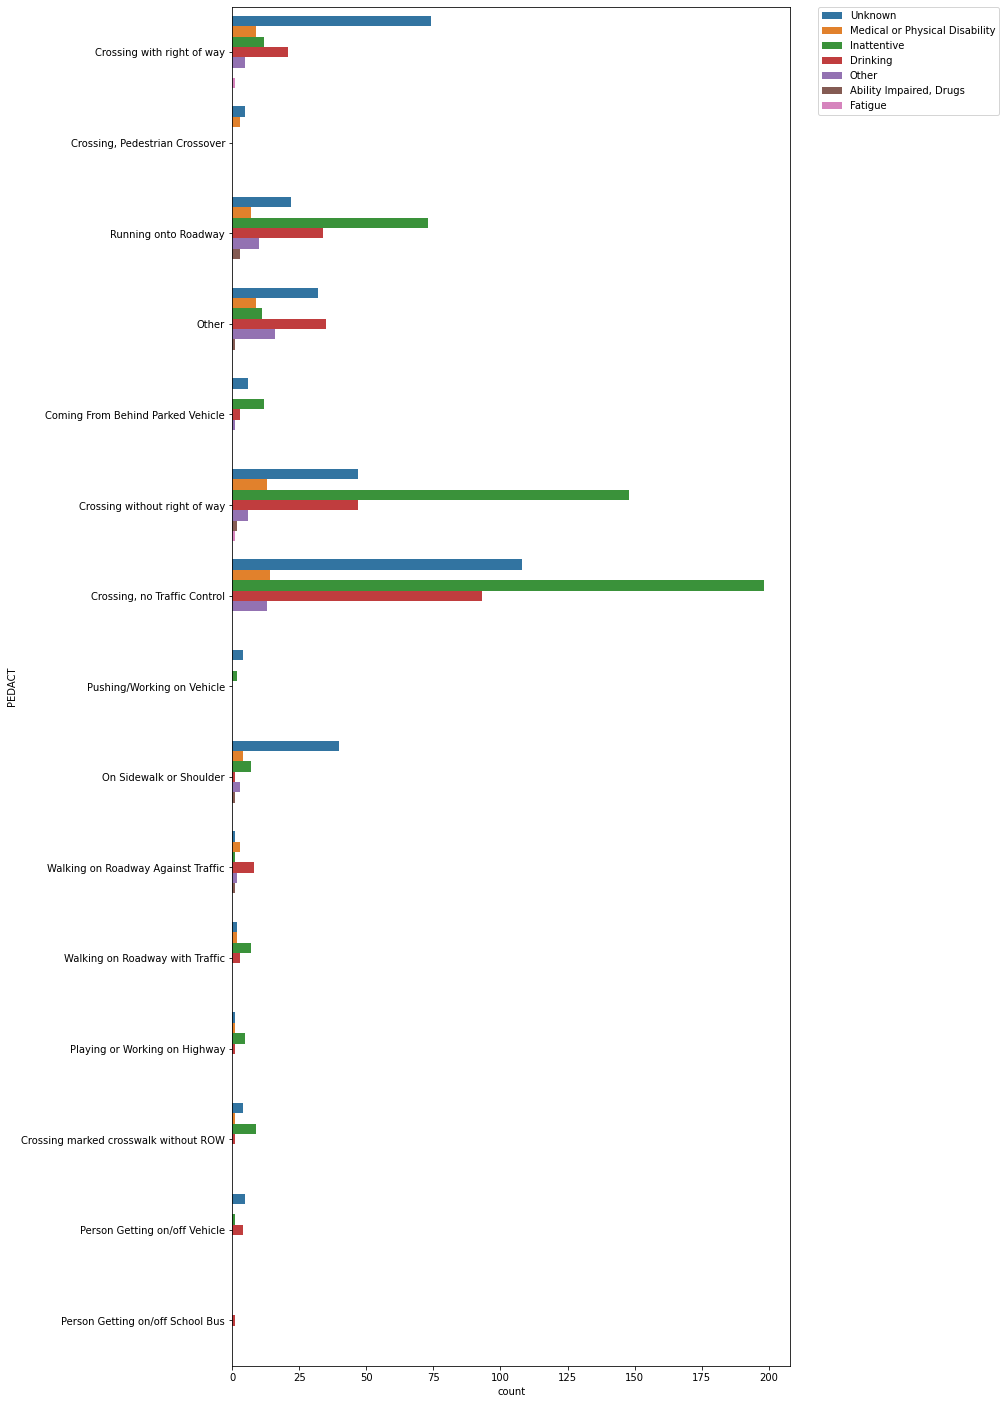

In [47]:
# ignoring normal pedestrian condition - need to look at that later, perhaps there are other factors

plt.figure(figsize = (10,25))
sns.countplot(data = ksi_df[(ksi_df['PEDACT'] != '<Null>') & (ksi_df['PEDCOND'] != '<Null>') & (ksi_df['PEDCOND'] != 'Normal')], y = 'PEDACT', hue = 'PEDCOND')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)